In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("data_510.csv", sep=",")
data = data.drop(["Unnamed: 0"], axis=1)

In [14]:
print(data.keys())
data['A']

Index(['A', 'B', 'C', 'D'], dtype='object')


0     0.822987
1     5.671705
2    -3.506486
3     2.688814
4     2.920214
        ...   
95    2.371033
96    0.841804
97    2.816419
98    0.883158
99   -1.262539
Name: A, Length: 100, dtype: float64

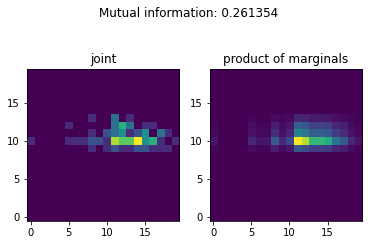

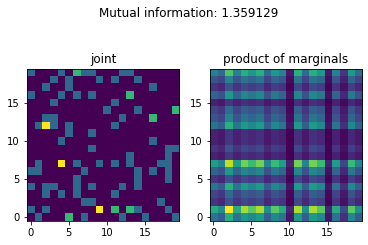

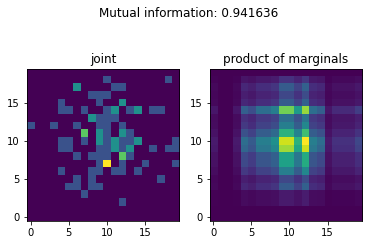

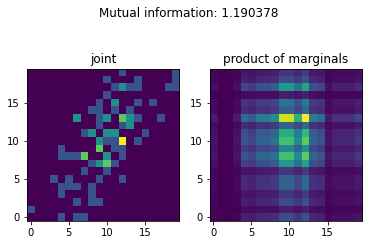

In [12]:
def MI(x,y,Nbins=21):
    bins = np.linspace(np.min(x),np.max(x),Nbins)
    eps=np.spacing(1)
    x_marginal = np.histogram(x,bins=bins)[0]
    x_marginal = x_marginal/x_marginal.sum()
    y_marginal = np.array(np.histogram(y,bins=bins)[0])
    y_marginal = y_marginal/y_marginal.sum()
    xy_joint = np.array(np.histogram2d(x,y,bins=(bins,bins))[0])
    xy_joint = xy_joint/xy_joint.sum()
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(xy_joint.T,origin='lower')
    plt.title('joint')
    plt.subplot(1,2,2)
    plt.imshow((x_marginal[:,None]*y_marginal[None,:]).T,origin='lower')
    plt.title('product of marginals')
    MI=np.sum(xy_joint*np.log(xy_joint/(x_marginal[:,None]*y_marginal[None,:]+eps)+eps))
    plt.suptitle('Mutual information: %f'%MI)
    return(MI)

x = data['A']
y = data['B']

MI(x,y)
MI(np.random.rand(len(x))*2-1,np.random.rand(len(x))*2-1)

xn=np.random.randn(len(x))
yn=np.random.randn(len(x))
yn1=xn+yn
MI(xn,yn)
MI(xn,yn1);